# User guide for plotting Conformal Prediction metrics


In [1]:
#import sys
#!{sys.executable} -m pip install numpy pandas seaborn

In [2]:
# Make sure to add the code to your PYTHONPATH
import sys
sys.path.append('src')
from pharmbio.cp import metrics, plotting

# So we can do customizations 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using Seaborn plotting defaults


Import the results from a Conformal predictor. 

In [3]:
df = pd.read_csv("test/resources/transporters.p-values.csv", delimiter=';')
df.columns

Index(['name', 'target', 'p-value (class -1)', 'p-value (class 1)'], dtype='object')

We do not need the 'name' column so this can be dropped

In [4]:
df = df.drop(columns=['name'])
df.shape

(233, 3)

In [5]:
df['target'].value_counts()

-1    125
 1    108
Name: target, dtype: int64

Split the dataframe into the list of true values (`true_lab`) and the matrix of p-values (`p_vals`). Note that the true labels **must** be integer numbers starting from 0, i.e. 0,1,2 for a three-class problem.

In [6]:
true_lab = df['target'].to_numpy()
true_lab[true_lab == -1] = 0

p_vals = df.drop(columns='target').to_numpy()
p_vals.shape

(233, 2)

## Compute metrics

In [7]:
metrics.calc_error_rate(true_lab, p_vals, sign=0.25)

(0.18454935622317598, array([0.24      , 0.12037037]))

In [8]:
metrics.calc_OF(true_lab, p_vals)

0.1360179639484979

In [9]:
CM = metrics.calc_confusion_matrix(true_lab, p_vals, significance=0.2, class_labels=[-1,1])
CM

,-1,1
-1,80,9
1,25,94
Empty,0,0
Both,20,5


## Plotting calibration curves

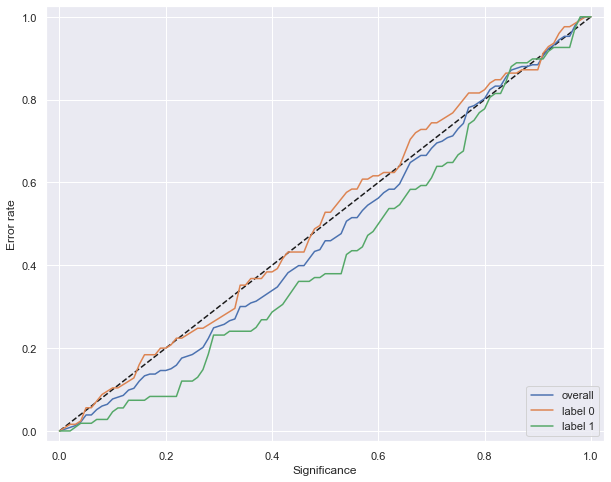

In [10]:
the_fig = plotting.plot_calibration_curve(true_lab, p_vals)

Plotting can also be done in a smaller range of significance values and has a few parameters to tweak the generated figure

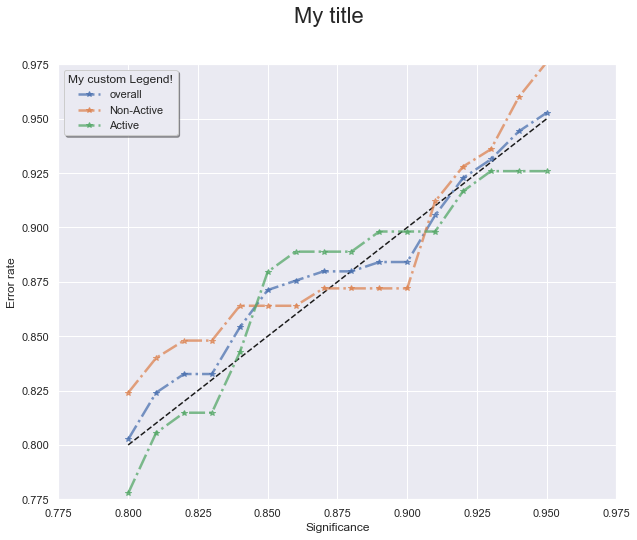

In [11]:
line_args = {'alpha': 0.75, 'marker':"*", 'linestyle': '-.', 'linewidth':2.5}

the_fig = plotting.plot_calibration_curve(true_lab, p_vals, significance_min=0.8, significance_max=.95, fig_padding=0.025,class_labels=["Non-Active", "Active"], **line_args)

# Set a custom title
the_fig.suptitle('My title', fontsize=22)

# Remove the old legend
plt.gca().legend_.remove()

# Add a new (custom) legend
plt.legend(shadow=True,title='My custom Legend!')

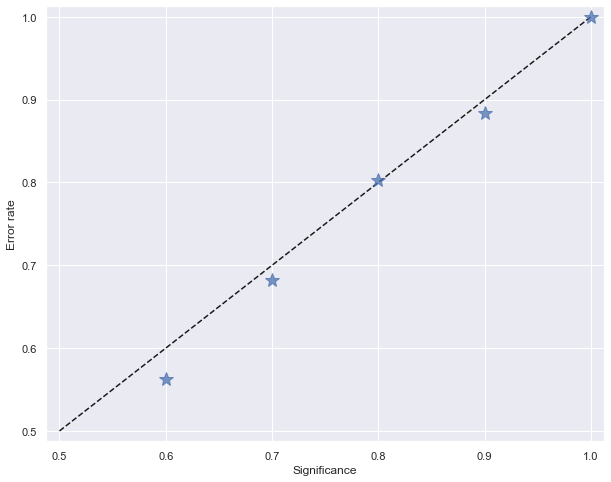

In [12]:
line_args = {'alpha': 0.75, 'marker':"*", 'ms': 15,'linestyle': 'None', 'linewidth':2.5}

the_fig = plotting.plot_calibration_curve(true_lab, p_vals, significance_min=0.5, significance_max=1, significance_step=0.1, class_labels=["Non-Active", "Active"],plot_all_labels=False, **line_args)

Clibration plot for a single class, note that we will get a warning from the underlying metric that computes the error-rate for each class

src/pharmbio/cp/metrics.py:39: RuntimeWarning: invalid value encountered in true_divide
  label_wise_erro_rate = np.array(label_wise_errors) / np.array(label_wise_counts)


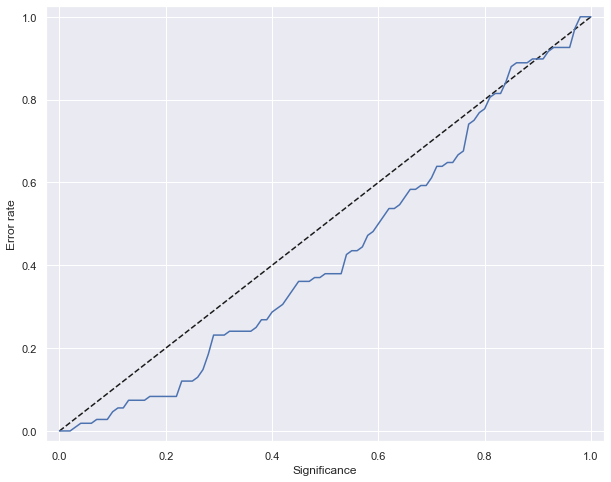

In [13]:
only_class_1 = (true_lab == 1)
true_1 = true_lab[only_class_1]
p_val_1 = p_vals[only_class_1]
the_fig = plotting.plot_calibration_curve(true_1, p_val_1, plot_all_labels=False)

## Plotting distribution of prediction sets

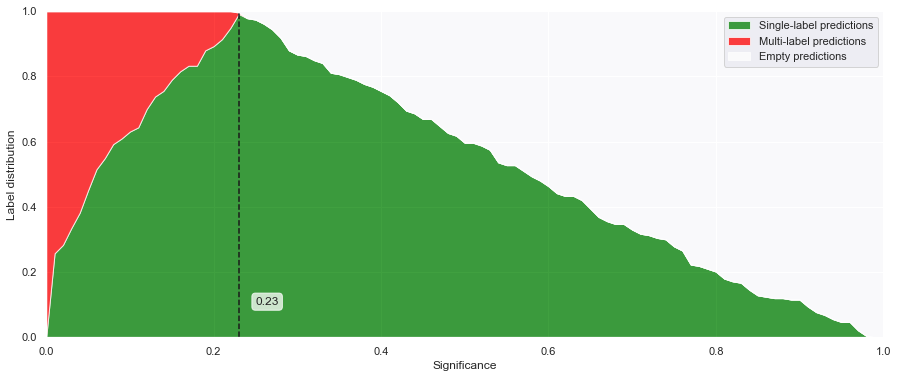

In [14]:
my_fig = plt.figure(figsize=(15,6))
custom_args = {'alpha': 0.75}
fig = plotting.plot_label_distribution(true_lab, p_vals, figure=my_fig, **custom_args)
# my_fig.savefig('area-plot.png',bbox_inches='tight')

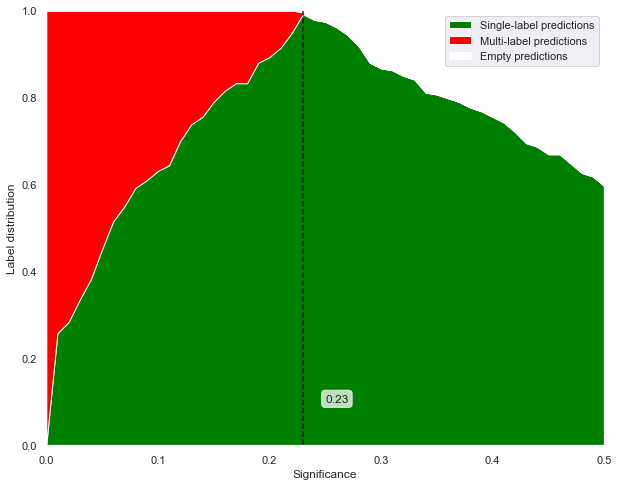

In [15]:
fig = plotting.plot_label_distribution(true_lab, p_vals, significance_max=.5)

## Plotting predictions using Bubble plots

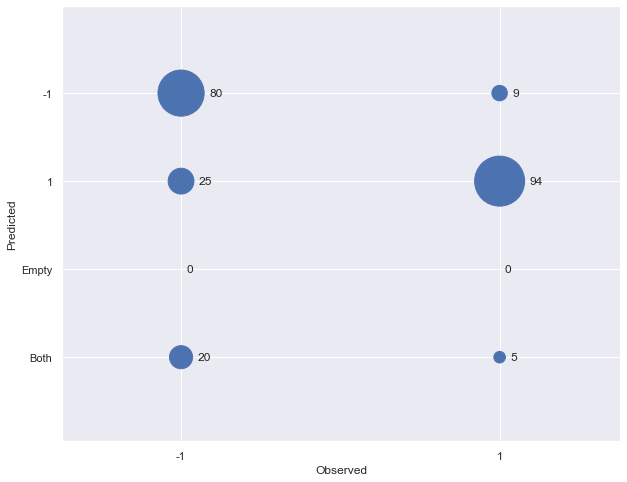

In [16]:
# We can use the confusion matrix computed earlier
bubble_plot = plotting.plot_confusion_matrix_bubbles(confusion_matrix=CM)

Text(0.5, 1.0, 'Bubble plot')

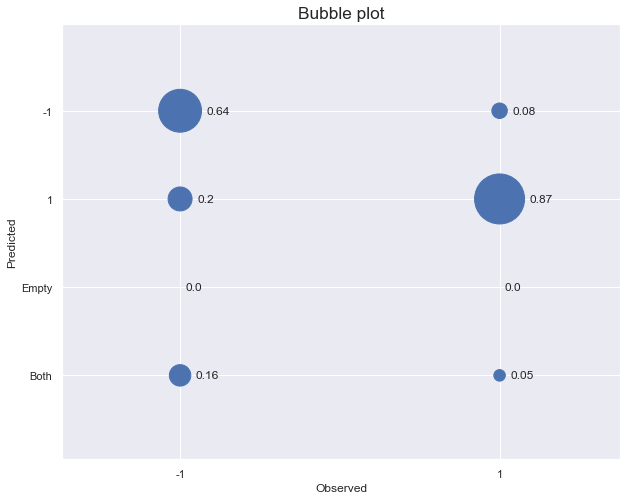

In [17]:
# Compute a normalized confusion matrix where each column sums to 1
CM_norm = metrics.calc_confusion_matrix(true_lab, p_vals, significance=0.2, class_labels=[-1,1], normalize_per_class=True)
bubble_plot_norm = plotting.plot_confusion_matrix_bubbles(confusion_matrix=CM_norm)
plt.title('Bubble plot', fontdict={'fontsize': 'x-large'})

## Plotting heatmaps of a confusion matrix

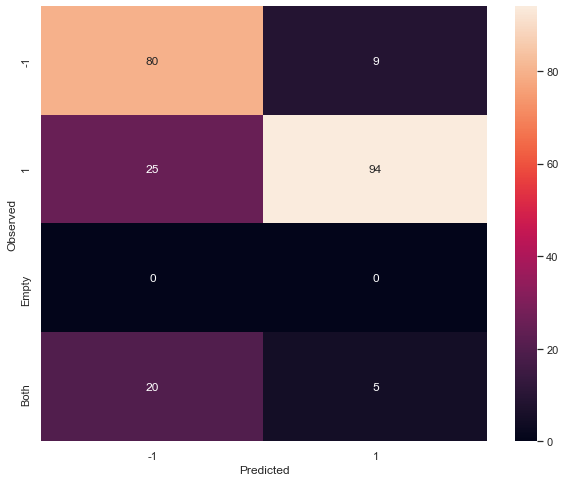

In [18]:
heat_m = plotting.plot_heatmap(CM)

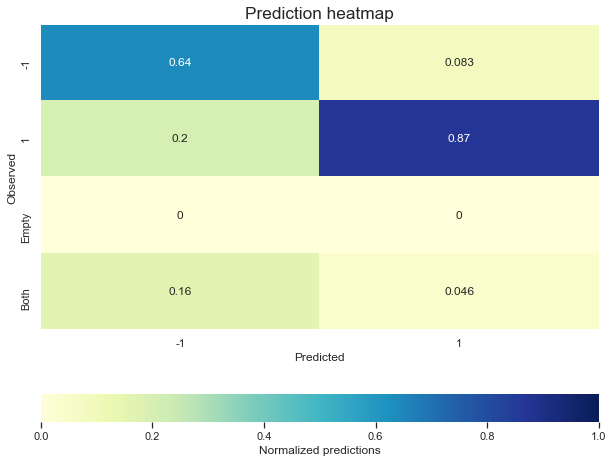

In [19]:
extra_args = {'vmax': 1,'cmap':"YlGnBu"} 
cbar_kws = {"orientation": "horizontal", 'label': 'Normalized predictions'}
heat_m_norm = plotting.plot_heatmap(CM_norm, title="Prediction heatmap", cbar_kws=cbar_kws,**extra_args)